Data Preprocessing [5 marks]:

Clean and prepare the data. Remember to treat data issues, perform feature scaling, encoding and any other relevant transformations.
If applicable, use dimensionality reduction and discuss how it impacts the clusters.
Explain your data preparation process.
Exploratory Data Analysis (EDA) [5 marks]:

Perform an EDA to understand the data and identify patterns that could inform the clustering.
Explain your findings.
Clustering Algorithms [10 marks]:

Implement at least three different clustering algorithms of your choice (e.g., K-Means, Hierarchical, DBSCAN). You can try any algorithms available in sklearn.
Use Elbow method, Silhouette analysis, or other techniques to determine the optimal number of clusters.
Discuss each method, and select the most appropriate
Interpreting Clusters [5 marks]:

Characterize the clusters formed: What kind of customers fall into each cluster? What features are most significant in distinguishing between clusters?
Actionable Insights [5 marks]:

Provide business recommendations based on the clusters formed. How would you target different customer segments?
Evaluation:
Quality of Data Preprocessing and EDA [10 marks]
Correct implementation and justification for selecting clustering algorithms [10 marks]
Interpretation of clusters and quality of business insights & recommendations [10 marks]
Code quality and report quality (including spelling and grammar) [5 marks]

## Data Preprocessing

In [180]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
random.seed(42)
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.cluster import KMeans, AffinityPropagation, MeanShift, SpectralClustering, AgglomerativeClustering, DBSCAN, OPTICS, Birch
from sklearn.mixture import GaussianMixture

In [181]:
df = pd.read_csv(r"D:\3.6120 DATA SCIENCE II\Customer_Data.csv")

Handling Data issues. Checking missing values.

In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [183]:
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [184]:
df.drop(columns=['CUST_ID'], inplace=True)

In [185]:
df.isna().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [186]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


Fill null value with median value.

In [187]:
median_minimum_payments = df['MINIMUM_PAYMENTS'].median()
median_credit_limit = df['CREDIT_LIMIT'].median()

# Fill null values in 'MINIMUM_PAYMENTS' and 'CREDIT_LIMIT' with their medians
df['MINIMUM_PAYMENTS'].fillna(median_minimum_payments, inplace=True)
df['CREDIT_LIMIT'].fillna(median_credit_limit, inplace=True)

In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

## EDA

Feature Scaling

In [189]:
col_list = df.columns

In [190]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the selected columns

df2 = scaler.fit_transform(df)

df2.shape


(8950, 17)

In [191]:
df2 = pd.DataFrame(df2, columns=df.columns)

Correlation Analysis:

Calculate and visualize the correlation matrix to identify relationships between features. Strong correlations may indicate patterns that could influence clustering.

<Axes: >

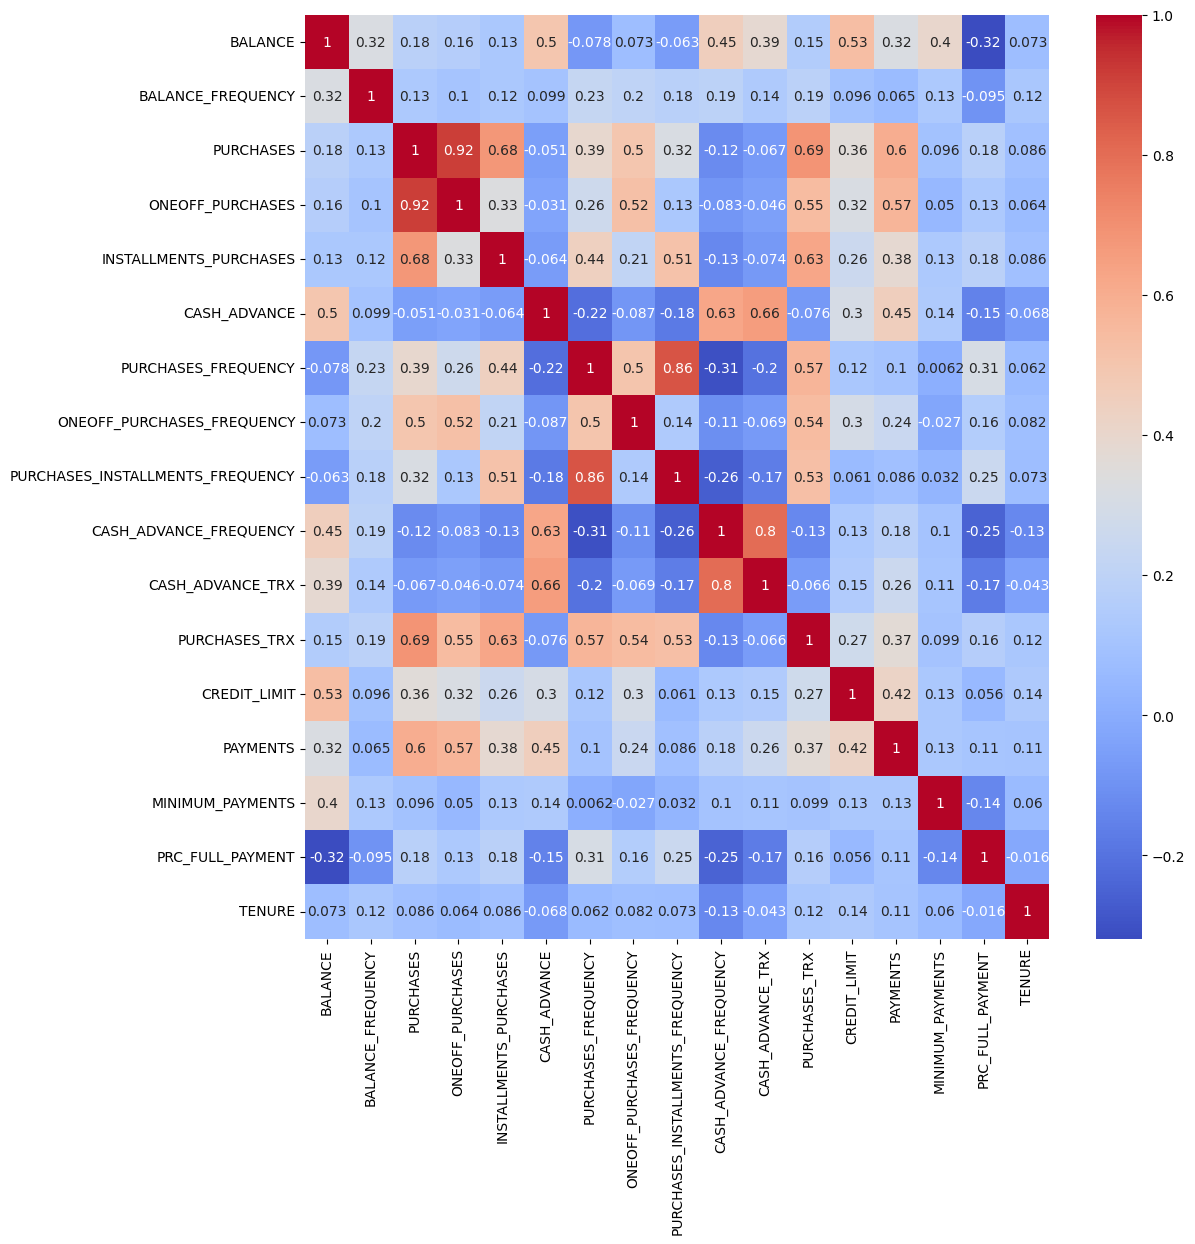

In [192]:
plt.figure(figsize = (12, 12))
sns.heatmap(df2.corr(), annot=True, cmap='coolwarm', 
            xticklabels=df_imputed.columns,
            yticklabels=df_imputed.columns)

 Encoding Categorical Data:

In this dataset, there are no categorical columns that require encoding, so skip this step.

 Dimensionality Reduction:

Dimensionality reduction techniques can be useful when you have a high number of features and want to reduce computational complexity or improve model performance.
Principal Component Analysis (PCA) is a common dimensionality reduction technique that can be applied to numerical features.

In [202]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
df_std = scaler.fit_transform(df2)

# Perform PCA
pca = PCA()
df_pca = pca.fit_transform(df_std)

# The transformed data is an array, convert it back into a dataframe
df_pca = pd.DataFrame(df_pca, columns=[f'PC{i+1}' for i in range(len(df.columns))])

# Print the explained variance ratio
print('Explained variance ratio:', pca.explained_variance_ratio_)

# Print the cumulative explained variance ratio
cumsum_variance = np.cumsum(pca.explained_variance_ratio_)
print('Cumulative explained variance ratio:', cumsum_variance)

# Show the first few rows of transformed dataframe
df_pca.head()


Explained variance ratio: [2.72976713e-01 2.03137796e-01 8.81318170e-02 7.47952439e-02
 6.22472925e-02 5.74005645e-02 4.88342555e-02 4.29920325e-02
 3.79825870e-02 3.08000227e-02 2.37225104e-02 1.77336964e-02
 1.42785685e-02 1.21691956e-02 1.01266703e-02 2.67034839e-03
 6.85226796e-07]
Cumulative explained variance ratio: [0.27297671 0.47611451 0.56424633 0.63904157 0.70128886 0.75868943
 0.80752368 0.85051572 0.8884983  0.91929833 0.94302084 0.96075453
 0.9750331  0.9872023  0.99732897 0.99999931 1.        ]


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17
0,-1.683649,-1.072241,0.475660,0.679928,0.043195,0.068069,0.822155,-0.018952,0.118336,-0.078196,-0.235948,-0.052497,-0.081637,-0.187992,0.149962,0.048266,-0.000161
1,-1.134085,2.509150,0.602216,-0.109542,0.662638,-1.102255,-0.384282,0.176154,0.674472,-0.777929,-0.870746,-0.607171,-0.034550,-0.733098,-0.532951,-0.082909,0.000003
2,0.969395,-0.383577,0.090970,1.238359,-2.166584,-0.320185,-1.542496,-0.229364,-0.867803,-0.001744,-0.762170,0.683870,0.696544,0.042389,0.221683,0.511325,0.000022
3,-0.888220,0.004648,1.499800,1.075271,0.225828,-0.171540,-0.236644,-0.690410,-0.064245,0.393690,0.747670,0.119186,-0.127887,-0.417356,-0.091930,-0.016174,-0.000010
4,-1.600021,-0.683795,0.347927,1.013642,-0.453816,0.077004,0.698278,0.245311,0.578032,-0.122073,-0.455167,-0.108719,-0.037507,-0.040989,0.290908,-0.070603,-0.000081


In [203]:
# Reduce to 2 components
pca = PCA(n_components = 0.90)
df_pca = pca.fit_transform(df_std)

# The transformed data is an array, convert it back into a dataframe
df_pca = pd.DataFrame(df_pca)

# Print the explained variance ratio
print('Explained variance ratio:', pca.explained_variance_ratio_)

# Print the cumulative explained variance ratio
cumsum_variance = np.cumsum(pca.explained_variance_ratio_)
print('Cumulative explained variance ratio:', cumsum_variance)

# Show the first few rows of transformed dataframe
df_pca.head()

Explained variance ratio: [0.27297671 0.2031378  0.08813182 0.07479524 0.06224729 0.05740056
 0.04883426 0.04299203 0.03798259 0.03080002]
Cumulative explained variance ratio: [0.27297671 0.47611451 0.56424633 0.63904157 0.70128886 0.75868943
 0.80752368 0.85051572 0.8884983  0.91929833]


,0,1,2,3,4,5,6,7,8,9
0,-1.683649,-1.072241,0.475660,0.679928,0.043195,0.068069,0.822155,-0.018952,0.118336,-0.078196
1,-1.134085,2.509150,0.602216,-0.109542,0.662638,-1.102255,-0.384282,0.176154,0.674472,-0.777929
2,0.969395,-0.383577,0.090970,1.238359,-2.166584,-0.320185,-1.542496,-0.229364,-0.867803,-0.001744
3,-0.888220,0.004648,1.499800,1.075271,0.225828,-0.171540,-0.236644,-0.690410,-0.064245,0.393690
4,-1.600021,-0.683795,0.347927,1.013642,-0.453816,0.077004,0.698278,0.245311,0.578032,-0.122073


Data Distribution:

Visualize the distribution of numerical features using histograms, box plots, and density plots to understand the spread and skewness of the data.

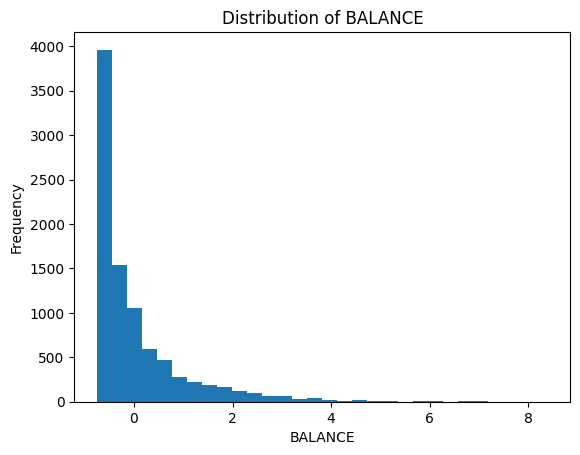

In [204]:
import matplotlib.pyplot as plt

# Example: Histogram for 'BALANCE' feature
plt.hist(df2['BALANCE'], bins=30)
plt.xlabel('BALANCE')
plt.ylabel('Frequency')
plt.title('Distribution of BALANCE')
plt.show()


Pairwise Scatter Plots:

Create scatter plots to visualize relationships between pairs of numerical features. This can help to identify potential clusters.

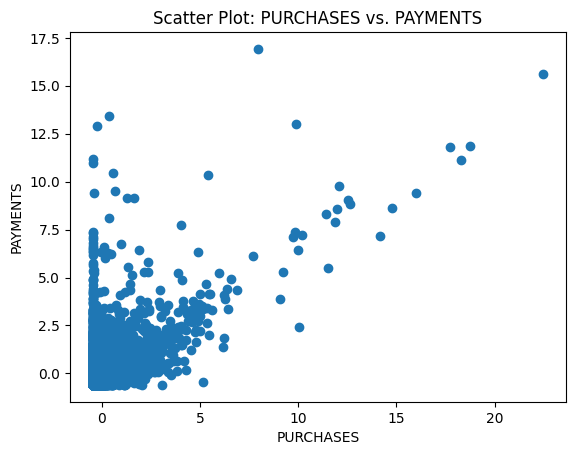

In [205]:
# Example: Scatter plot between 'PURCHASES' and 'PAYMENTS'
plt.scatter(df2['PURCHASES'], df2['PAYMENTS'])
plt.xlabel('PURCHASES')
plt.ylabel('PAYMENTS')
plt.title('Scatter Plot: PURCHASES vs. PAYMENTS')
plt.show()


Dimensionality Reduction Check:

If it didn't performed dimensionality reduction (e.g., PCA). Then I can visualize the reduced dimensions to see if there are any clear clusters emerging.

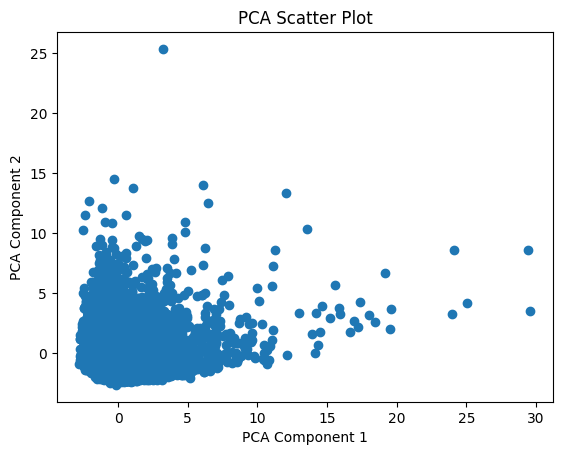

In [206]:
# Scatter plot of the first two principal components
plt.scatter(df_pca[0], df_pca[1])
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA Scatter Plot')
plt.show()


BALANCE: Balance amount left in their account to make purchases  
PURCHASES_FREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)   
PAYMENTS: Amount of Payment done by user   
CREDIT_LIMIT: Limit of Credit Card for user  

In [223]:
best_cols = ["BALANCE",  "PURCHASES_FREQUENCY", "PAYMENTS", "CREDIT_LIMIT"]

In [225]:
df5 = pd.DataFrame(df2[best_cols])

print(str(df5.shape))

(8950, 4)


C:\Users\lifen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


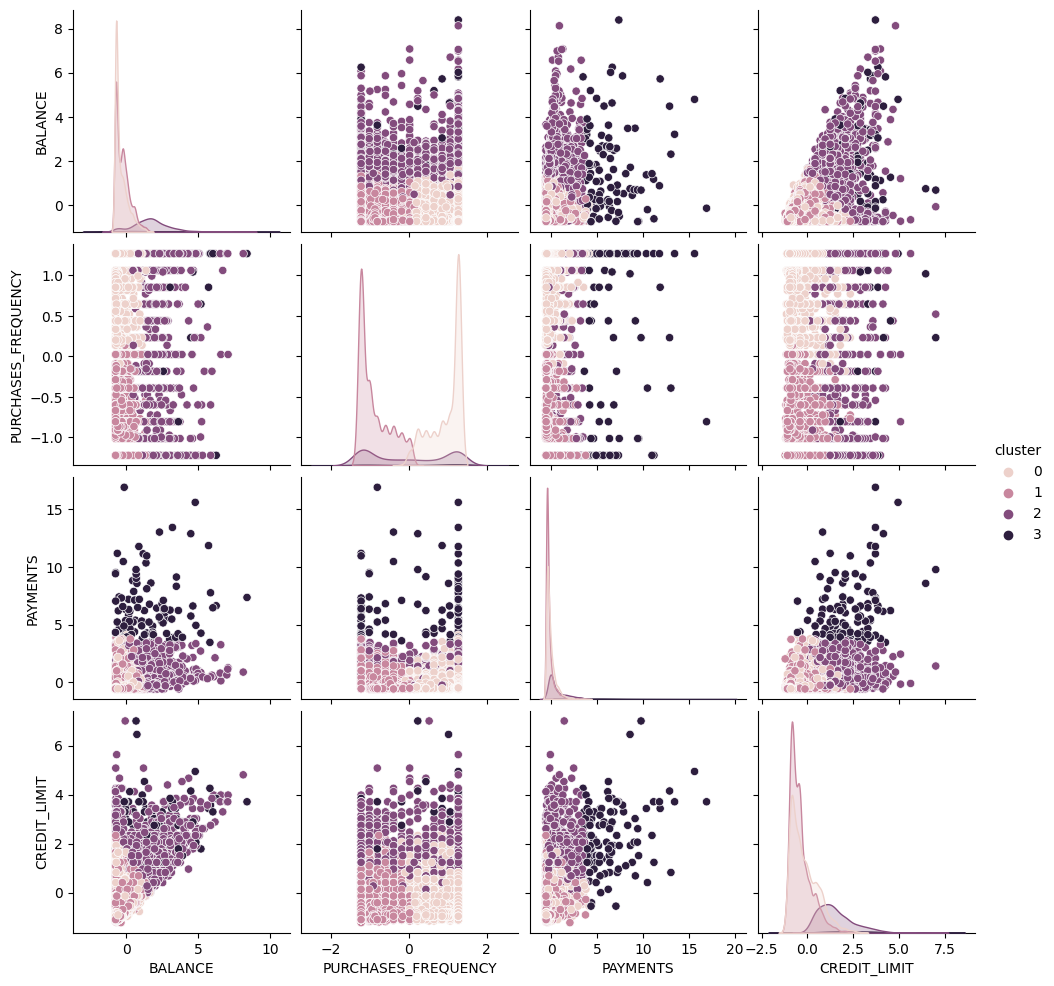

In [226]:
dd = KMeans(n_clusters = 4)
b = dd.fit_predict(df5)

df5['cluster'] = b
best_cols.append('cluster')

sns.pairplot(df5[best_cols], hue='cluster')

## Clustering

In [207]:
del silhouette_score
from sklearn.metrics import silhouette_score

C:\Users\lifen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\lifen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\lifen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\U

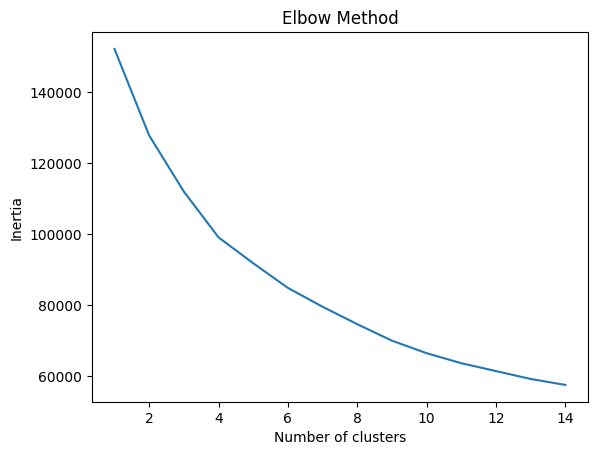

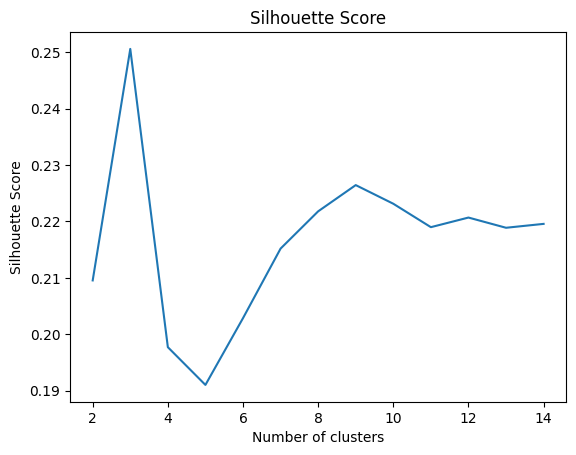

In [209]:
inertia = []
silhouette_avg = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df2)
    inertia.append(kmeans.inertia_)
    labels = kmeans.labels_
    centers = kmeans.cluster_centers_
    if i>1:
        silhouette_avg = silhouette_avg + [silhouette_score(df2, labels)]

# Silhouette Score

plt.plot(range(1, 15), inertia)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


plt.plot(range(2, 15), silhouette_avg)
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

Using the elbow method, pick a number of clusters to be 4.

In [212]:
from sklearn.metrics import silhouette_samples, silhouette_score
from matplotlib import cm

for x in range(2, 6):
    alg = KMeans(n_clusters = x, )
    label = alg.fit_predict(df2)
    print('Silhouette-Score for', x,  'Clusters: ', silhouette_score(df2, label))

C:\Users\lifen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette-Score for 2 Clusters:  0.20949692655850133


C:\Users\lifen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette-Score for 3 Clusters:  0.25063686531646423


C:\Users\lifen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette-Score for 4 Clusters:  0.1979789027083201


C:\Users\lifen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette-Score for 5 Clusters:  0.19292005934014836


In [213]:
K = 4
kmeans = KMeans(n_clusters=K, random_state=0).fit(df2)

C:\Users\lifen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


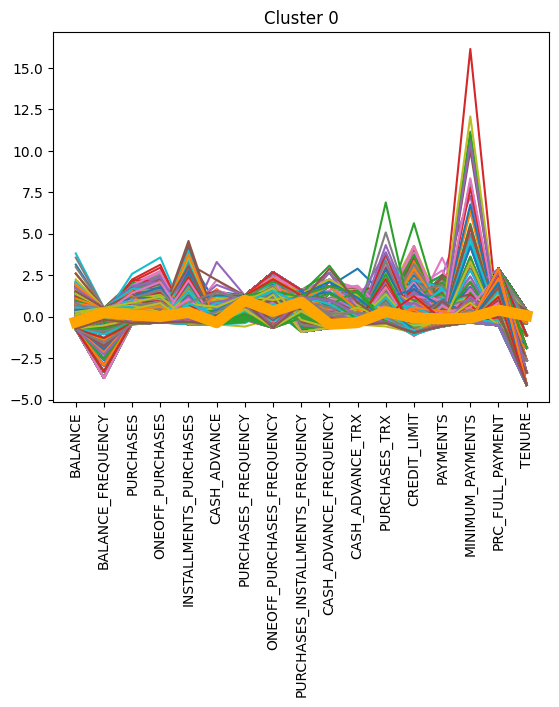

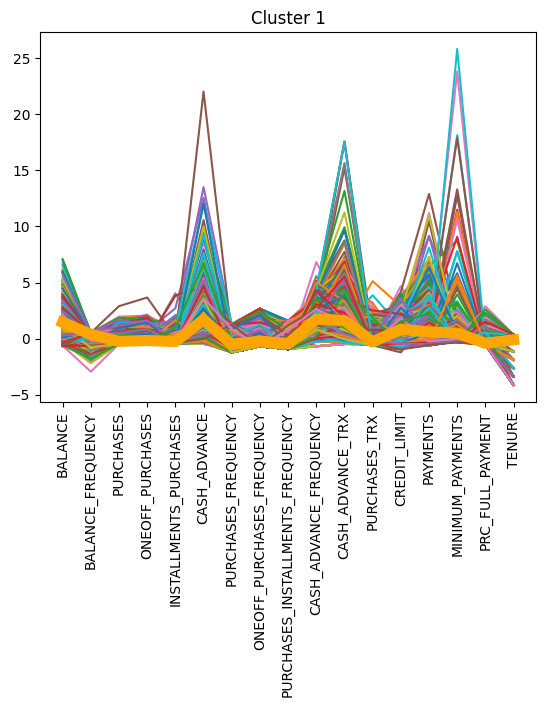

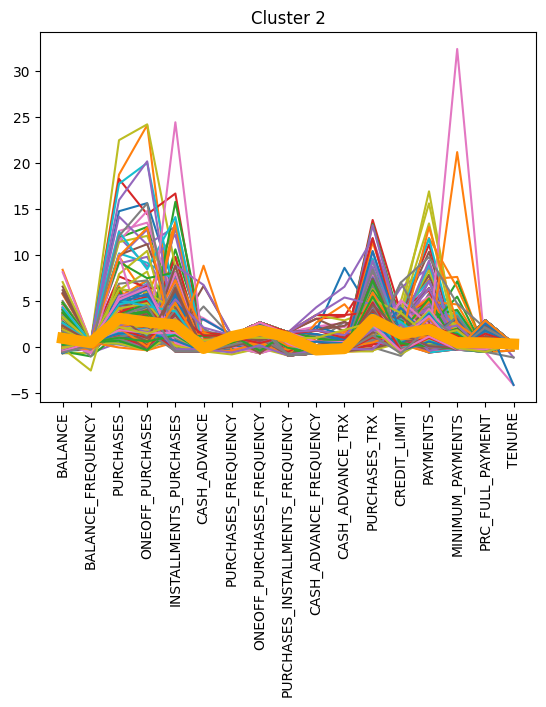

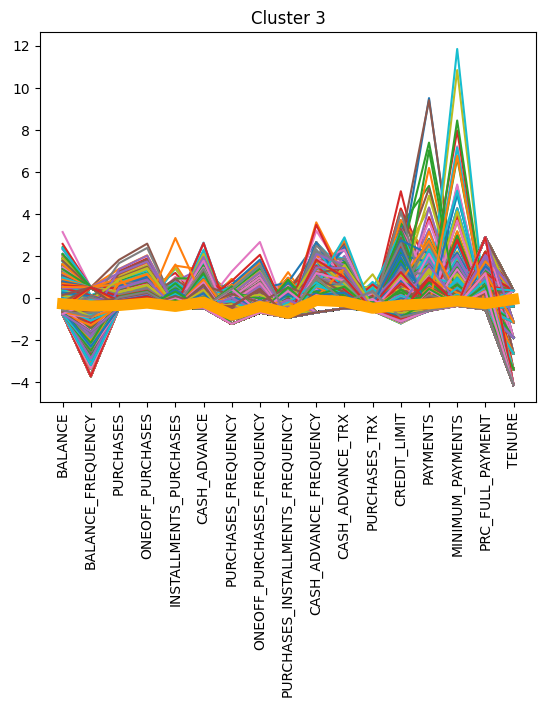

In [215]:
for c in range(K):
    # Subset the data for the current cluster
    cluster_data = df2[kmeans.labels_ == c]

    # Transpose and plot the cluster data
    cluster_data.T.plot(legend=False)
    
    # Set the x-axis tick positions and labels
    x_ticks = np.arange(len(cluster_data.columns))
    x_labels = cluster_data.columns  # Replace with your own labels if needed

    # Plot the cluster center in orange
    plt.plot(kmeans.cluster_centers_[c], linewidth=8, color='orange')
    
    # Set the title for the current cluster
    plt.title("Cluster " + str(c))
    
    # Set the x-axis ticks and labels
    plt.xticks(x_ticks, x_labels, rotation=90)  # Rotate labels for better visibility

# Show the plots
plt.show()

In [216]:
pd.set_option('display.max_colwidth', None)

results = []

for y in range(2, 5):
    pca_result = {"PCA Components": y}
    for x in range(2, 7):
        alg = KMeans(n_clusters=x)
        label = alg.fit_predict(df2)
        silhouette = silhouette_score(df2, label)
        inertia = alg.inertia_
        pca_result[f'Clusters {x}'] = f"Silhouette: {silhouette}, Inertia: {inertia}"
    results.append(pca_result)

df3 = pd.DataFrame(results)
print(df3)

C:\Users\lifen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\lifen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\lifen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\U

   PCA Components  \
0               2   
1               3   
2               4   

                                                     Clusters 2  \
0   Silhouette: 0.20994376741153917, Inertia: 127784.4170873488   
1  Silhouette: 0.20951117145873602, Inertia: 127784.44628461213   
2  Silhouette: 0.21031659521212226, Inertia: 127784.83961722945   

                                                     Clusters 3  \
0   Silhouette: 0.25061926305697263, Inertia: 111974.0207123153   
1  Silhouette: 0.25061926305697263, Inertia: 111973.97335474718   
2   Silhouette: 0.2506116638886035, Inertia: 111973.88914575781   

                                                   Clusters 4  \
0  Silhouette: 0.1976791965228765, Inertia: 99061.93984229014   
1  Silhouette: 0.1976791965228765, Inertia: 99061.93984229014   
2  Silhouette: 0.1976791965228765, Inertia: 99061.93984229014   

                                                    Clusters 5  \
0   Silhouette: 0.19327119581091734, Inertia: 9149

Clusters 2,  PCA = 2 is better

C:\Users\lifen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


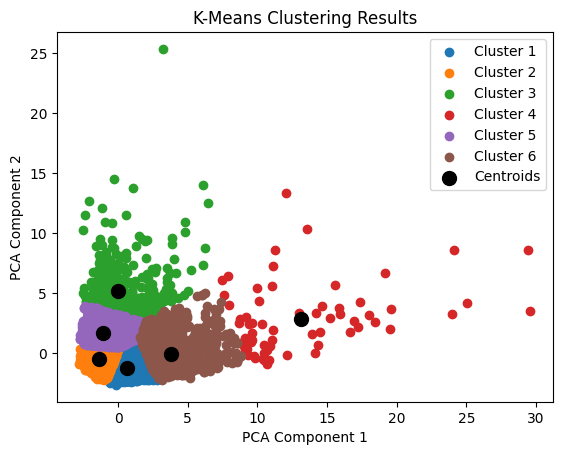

In [217]:
# Perform PCA with 2 components
pca = PCA(n_components=2)
df2_pca = pca.fit_transform(df2)

# Apply K-means clustering with 6 clusters
kmeans = KMeans(n_clusters=6)
kmeans.fit(df2_pca)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# Scatter plot the data points with different colors for each cluster
for cluster in range(6):
    plt.scatter(df2_pca[labels == cluster, 0], df2_pca[labels == cluster, 1], label=f'Cluster {cluster + 1}')

# Plot cluster centers
plt.scatter(centers[:, 0], centers[:, 1], s=100, c='black', label='Centroids')

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clustering Results')
plt.legend()
plt.show()


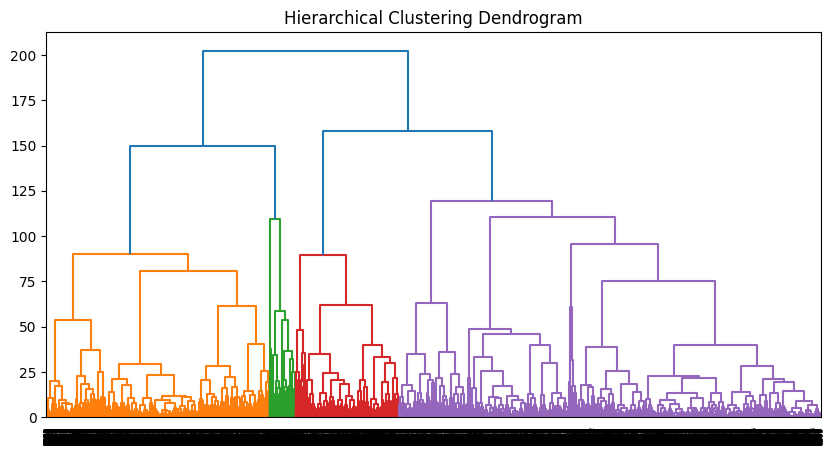

In [218]:
# Importing required libraries
from scipy.cluster.hierarchy import dendrogram, linkage

# Generate linkage matrix
Z = linkage(df2, method='ward')


plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

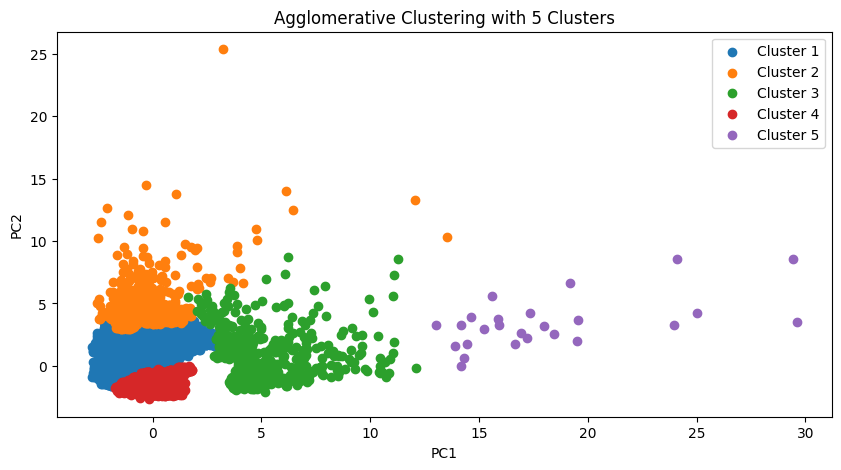

In [221]:
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering

# Assuming 'df2' is your data
df4 = pd.DataFrame(PCA(n_components=2).fit_transform(df2))
preds = pd.Series(AgglomerativeClustering(n_clusters=6).fit_predict(df4))
df4['target'] = preds  # Assigning the 'preds' series as a new column 'target'

plt.figure(figsize=(10, 5))
for cluster in range(5):
    plt.scatter(df4[df4['target'] == cluster].iloc[:, 0], df4[df4['target'] == cluster].iloc[:, 1], label=f'Cluster {cluster + 1}')

plt.legend()
plt.title('Agglomerative Clustering with 5 Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()
